In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import recordlinkage as rl

In [8]:
# loading files
figures = pd.read_excel('../../data/figures.xlsx')
records = pd.read_excel('../../data/records.xlsx')
uci_changed = pd.read_csv('../../data/uci_change.csv')
bp = pd.read_csv('../../data/raw/bangmok/bangmok_person.csv')
bangmok = pd.read_csv('../../data/raw/bangmok/bangmok.csv')
bp = pd.merge(bp, bangmok, on='bpid').sort_values('pass_date').drop_duplicates(subset='bpid',keep='first')
dates = pd.read_csv('../../data/dates.csv')
# fixing encoding issue '\ufeff'
figures['한자명칭'] = figures['한자명칭'].apply(lambda x: x.replace('\ufeff',''))

In [9]:
# 두음법칙
dueum = {'라': '나', '락': '낙', '란': '난', '랄': '날', '람': '남', '랍': '납', '랑': '낭', '래': '내', '랭': '냉', '냑': '약', '략': '약', '냥': '양', '량': '양', '녀': '여', '려': '여', '녁': '역', '력': '역', '년': '연', '련': '연', '녈': '열', '렬': '열', '념': '염', '렴': '염', '렵': '엽', '녕': '영', '령': '영', '녜': '예', '례': '예', '로': '노', '록': '녹', '론': '논', '롱': '농', '뢰': '뇌', '뇨': '요', '료': '요', '룡': '용', '루': '누', '뉴': '유', '류': '유', '뉵': '육', '륙': '육', '륜': '윤', '률': '율', '륭': '융', '륵': '늑', '름': '늠', '릉': '능', '니': '이', '리': '이', '린': '인', '림': '임', '립': '입'}
def name_change(x):
    new_name = ''
    for char in list(x[1:]):
        if char in dueum:
            new_name = x[1:].replace(char, dueum[char])
        else:
            new_name = x[1:]
    return x[0]+new_name
bp['korname'] = bp['korname'].apply(name_change)
figures['한글명칭'] = figures['한글명칭'].apply(name_change)

In [10]:
notfound = figures.copy()

In [11]:
# intersection notfound and aks
cdict = dict(zip(uci_changed['bpid'], uci_changed['new_uci']))
notfound['UCI'] = notfound['UCI'].apply(lambda x: x if x not in cdict else cdict[x])
common_keys = set(bp['bpid']).intersection(set(notfound['UCI']))

In [12]:
# filter 0 finish. paste to csv file! filter 0 : notfound guarantee -->4908
filter0 = notfound.set_index('UCI').loc[common_keys].reset_index()
found = dict(zip(filter0['인물_ID'], filter0['UCI']))


In [13]:
f0_bp = pd.merge(filter0, bp, left_on='UCI', right_on= 'bpid')
# f0_bp[(abs(f0_bp['생년']-f0_bp['birth'])>10)&(f0_bp['pass_year']-f0_bp['생년']<15)][['UCI','인물_ID','한글명칭','한자명칭','생년','birth','pass_year','몰년', 'rdate', 'family_clan', 'death','king' ]]
f0_bp[(f0_bp['생년']-f0_bp['pass_year']>0)][['UCI','인물_ID','한글명칭','한자명칭','생년','birth','pass_year','몰년', 'rdate_m', 'family_clan', 'death','king' ]]

for i in f0_bp[abs(f0_bp['몰년']-f0_bp['death']>30)].index:
    print('# '+f0_bp.loc[i]['korname'] + ', '+f0_bp.loc[i]['인물_ID']+', '+f0_bp.loc[i]['UCI'])


# 박태유, M_0002651, G002+AKS-KHF_13BC15D0DCC720B1648X0
# 민성, M_0046655, G002+AKS-KHF_12BBFCC131FFFFB1432X0
# 이덕부, M_0004222, G002+AKS-KHF_13C774B355BD80B1675X0


In [14]:
found_rm = '''이협, M_0000784, G002+AKS-KHF_12C774D611FFFFB1577X0, pass_year<생년
민성, M_0046655, G002+AKS-KHF_12BBFCC131FFFFB1432X0, pass_year<생년
이은용, M_0004918, G002+AKS-KHF_13C774C740C6A9B1802X0, pass_year<생년
조욱, M_0056048, G002+AKS-KHF_12C870C6B1FFFFB1432X0, pass_year<생년
김섭, M_0000283, G002+AKS-KHF_12AE40C12DFFFFU9999X1, pass_year<생년
김사원, M_0001574, G002+AKS-KHF_13AE40C0ACC6D0U9999X0, pass_year<생년
최환, M_0058376, G002+AKS-KHF_12CD5CD658FFFFU9999X1, pass_year<생년
허휘, M_0060537, G002+AKS-KHF_12D5C8D718FFFFB1709X0, abs(생년-birth)>60
김천일, M_0001963, G002+AKS-KHF_13AE40CC9CC77CB1622X0, abs(생년-birth)>60
조돈, M_0055421, G002+AKS-KHF_12C870B3C8FFFFB1716X0, abs(생년-birth)>60
송이창, M_0003026, G002+AKS-KHF_13C1A1C774CC3DB1678X0, abs(생년-birth)>60
신한, M_0049378, G002+AKS-KHF_12C2E0D55CFFFFB1611X0, abs(생년-birth)>60
김정운, M_0001865, G002+AKS-KHF_13AE40C815C6B4B1802X0, abs(생년-birth)>60
이덕연, M_0004226, G002+AKS-KHF_13C774B355C5F0B1751X0, abs(생년-birth)>60
김창일, M_0001952, G002+AKS-KHF_13AE40CC3DC77CB1822X0, abs(생년-birth)>60
이성연, M_0004525, G002+AKS-KHF_13C774C131C5F0B1766X0, abs(생년-birth)>60
한경기, M_0006420, G002+AKS-KHF_13D55CACBDAE30B1778X0, abs(생년-birth)>60
권회, M_0000212, G002+AKS-KHF_12AD8CD68CFFFFB1769X0, abs(생년-birth)>60'''
found_rm = {i.split(', ')[1]:i.split(', ')[2] for i in found_rm.split('\n')}

In [15]:
# filter 0: 이상치 제거 4908 - 18 = 4890
for k in found_rm:
    del found[k]
filter0 = notfound.set_index('인물_ID').loc[found.keys()].reset_index()

In [16]:
notfound = notfound[~notfound['인물_ID'].isin(filter0['인물_ID'])]

In [17]:
# filter 1: 한자명, 생년, 몰년이 같은 사람 --> 20 (4890 + 20 = 4910)
notfound_bdchecked = notfound[(notfound['생년'].notnull())&(notfound['몰년'].notnull())]
bp_bdchecked = bp[(bp['death'].notnull()) & (bp['birth'].notnull())]
bp_bdchecked.loc[:,'birth'] = bp_bdchecked.loc[:,'birth'].astype(int)
bp_bdchecked.loc[:,'death'] = bp_bdchecked.loc[:,'death'].astype(int)
filter1 = pd.merge(notfound_bdchecked, bp_bdchecked, left_on = ['한자명칭','생년','몰년'], 
         right_on=['chnname','birth','death'], how='inner')
found.update(dict(zip(filter1['인물_ID'], filter1['bpid'])))
notfound = notfound[~notfound['인물_ID'].isin(filter1['인물_ID'])]

/Users/dhchoi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:964: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [18]:
len(found)

4910

In [19]:
# filter 2: 한자명, 생년이 같은 사람 --> 22 (4908 + 20 + 22 = 4932)

filter2 = pd.merge(notfound[notfound['생년'].notnull()], bp[bp['birth'].notnull()], left_on = ['한자명칭','생년',], 
         right_on=['chnname','birth',], how='inner')
found.update(dict(zip(filter2['인물_ID'], filter2['bpid'])))
notfound = notfound[~notfound['인물_ID'].isin(filter2['인물_ID'])]

In [20]:
len(found)

4932

In [21]:
len(filter2[['인물_ID','UCI','bpid','korname','chnname','birth','death']])

22

In [22]:
# filter 3: 한자명, 몰년이 같은 사람 --> 3 (4908 + 20 + 22 + 3 = 4935)

filter3 = pd.merge(notfound[notfound['몰년'].notnull()], bp[bp['death'].notnull()], left_on = ['한자명칭','몰년',], 
         right_on=['chnname','death',], how='inner')
found.update(dict(zip(filter3['인물_ID'], filter3['bpid'])))
notfound = notfound[~notfound['인물_ID'].isin(filter3['인물_ID'])]

In [23]:
# filter 4: 한글명, 생년이 같은 사람 --> 3 (4908 + 20 + 22 + 3 = 4938)

filter4 = pd.merge(notfound[notfound['생년'].notnull()], bp[bp['birth'].notnull()], left_on=['한글명칭','생년'], right_on=['korname','birth'])
found.update(dict(zip(filter4['인물_ID'], filter4['bpid'])))
notfound = notfound[~notfound['인물_ID'].isin(filter4['인물_ID'])]
len(found)

4938

In [24]:
found_df = figures[figures['인물_ID'].isin(found.keys())]
found_df.loc[:,'bpid'] = found_df.loc[:,'인물_ID'].map(found)
found_df = pd.merge(found_df,bp, on='bpid')

/Users/dhchoi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [25]:
records_found = pd.merge(records, found_df, on='인물_ID')
records_found.loc[:,'서기일'] = records_found['서기일'].replace("??",'15').astype(int)
records_found['solardate'] = records_found['서기년'].astype(str)+'-'+records_found['서기월'].astype(str).str.zfill(2)+'-'+records_found['서기일'].astype(str).str.zfill(2)
records_found = pd.merge(records_found, dates, on='solardate')
srdate = dict(zip(dates['solardate'], dates['rdate']))

KeyError: 'solardate'

In [34]:
# rfbd = records_found_birth_death
rfbd = records_found[(records_found['birth'].notnull()) & (records_found['death'].notnull())]
rfbd.loc[:,'birth'] = rfbd['birth'].astype(int)
rfbd.loc[:,'death'] = rfbd['death'].astype(int)
rfbd.loc[:,'birth_rdate'] = (rfbd['birth'].astype(str)+'-06-15').map(srdate)
rfbd.loc[:,'death_rdate'] = (rfbd['death'].astype(str)+'-06-15').map(srdate)


(0, 100)

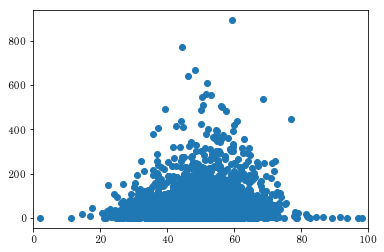

In [61]:
a = pd.merge(rbgap.rename('rbgap'), rfbd.groupby('bpid').size().rename('freq'), left_index=True, right_index=True)
plt.scatter(a['rbgap']/365, a['freq'])
plt.xlim([0,100])

In [42]:
rbgap = rfbd.groupby('bpid')['rdate'].apply(lambda x: np.median(list(x))) - rfbd.groupby('bpid')['birth_rdate'].mean()
rdgap = rfbd.groupby('bpid')['death_rdate'].mean() - rfbd.groupby('bpid')['rdate'].apply(lambda x: np.median(list(x)))

t = rbgap.value_counts().sort_index()
# plt.scatter(t.index,t, marker='.')
for i in t.index:
    print(i/365, t[i])

-269.0986301369863 1
-198.33424657534246 1
-181.94383561643835 1
-70.86575342465754 1
-54.346575342465755 1
-39.24657534246575 1
2.1136986301369864 1
11.323287671232876 1
14.397260273972602 1
16.90958904109589 1
17.426027397260274 1
20.60958904109589 1
21.208219178082192 1
21.405479452054795 1
21.576712328767123 1
21.613698630136987 1
21.646575342465752 1
21.783561643835615 1
21.912328767123288 1
22.124657534246577 1
22.35890410958904 1
22.38082191780822 1
22.73972602739726 1
22.763013698630136 1
22.923287671232877 1
22.99041095890411 1
23.23013698630137 1
23.784931506849315 1
24.065753424657533 1
24.115068493150684 1
24.205479452054796 1
24.263013698630136 1
24.29041095890411 1
24.367123287671234 1
24.39178082191781 1
24.405479452054795 1
24.545205479452054 1
24.66849315068493 1
24.795890410958904 1
24.91780821917808 1
24.93972602739726 1
24.95068493150685 1
25.07945205479452 1
25.117808219178084 1
25.197260273972603 1
25.297260273972604 1
25.301369863013697 1
25.435616438356163 1
25.

40.62465753424657 1
40.636986301369866 1
40.64109589041096 1
40.64657534246575 1
40.64931506849315 1
40.66027397260274 1
40.68219178082192 1
40.68767123287671 1
40.68904109589041 1
40.73698630136986 1
40.73972602739726 1
40.75068493150685 2
40.75616438356165 1
40.75890410958904 1
40.76438356164383 1
40.775342465753425 1
40.821917808219176 1
40.823287671232876 1
40.85205479452055 1
40.87123287671233 1
40.893150684931506 1
40.895890410958906 1
40.897260273972606 1
40.90958904109589 1
40.92465753424658 1
40.942465753424656 1
40.95068493150685 2
40.964383561643835 1
40.99178082191781 1
41.04383561643836 2
41.053424657534244 1
41.054794520547944 1
41.06164383561644 2
41.06301369863014 1
41.06849315068493 1
41.07123287671233 1
41.07397260273972 1
41.07945205479452 1
41.084931506849315 1
41.08904109589041 1
41.11506849315069 1
41.11780821917808 1
41.12602739726027 1
41.131506849315066 1
41.13972602739726 1
41.14246575342466 1
41.156164383561645 1
41.18082191780822 1
41.23150684931507 1
41.238

46.820547945205476 1
46.827397260273976 1
46.83150684931507 1
46.83287671232877 1
46.83835616438356 2
46.85068493150685 1
46.85479452054795 1
46.85890410958904 1
46.87671232876713 1
46.87945205479452 2
46.88493150684931 1
46.88630136986301 1
46.893150684931506 1
46.90958904109589 1
46.912328767123284 1
46.913698630136984 2
46.93150684931507 1
46.93698630136986 1
46.97260273972603 1
46.989041095890414 1
46.99452054794521 1
46.99589041095891 1
47.00547945205479 1
47.013698630136986 1
47.02191780821918 1
47.02465753424657 1
47.04657534246575 1
47.04794520547945 1
47.04931506849315 1
47.05205479452055 1
47.056164383561644 1
47.07123287671233 1
47.07671232876712 1
47.09315068493151 2
47.104109589041094 1
47.106849315068494 1
47.10958904109589 1
47.11232876712329 1
47.11780821917808 1
47.12328767123287 2
47.13972602739726 1
47.153424657534245 1
47.15890410958904 1
47.16712328767123 1
47.172602739726024 1
47.19041095890411 1
47.21095890410959 2
47.21369863013699 1
47.21917808219178 1
47.22054

54.87671232876713 1
54.916438356164385 1
54.941095890410956 1
54.95342465753425 1
54.961643835616435 1
54.96986301369863 1
54.98219178082192 1
54.986301369863014 1
55.01917808219178 1
55.02876712328767 1
55.032876712328765 1
55.057534246575344 1
55.06301369863014 1
55.07123287671233 1
55.1013698630137 2
55.11232876712329 1
55.12602739726027 1
55.12876712328767 1
55.14794520547945 1
55.16027397260274 1
55.178082191780824 1
55.18082191780822 1
55.19041095890411 1
55.19178082191781 1
55.21506849315068 1
55.224657534246575 1
55.227397260273975 1
55.23013698630137 1
55.25753424657534 1
55.26027397260274 1
55.26301369863014 1
55.275342465753425 1
55.28219178082192 1
55.28493150684932 1
55.298630136986304 1
55.3013698630137 1
55.31369863013698 1
55.33698630136986 1
55.33972602739726 1
55.367123287671234 1
55.38904109589041 1
55.4 1
55.41095890410959 1
55.41917808219178 1
55.464383561643835 1
55.47671232876712 1
55.487671232876714 1
55.4986301369863 1
55.55068493150685 1
55.57260273972603 1
55

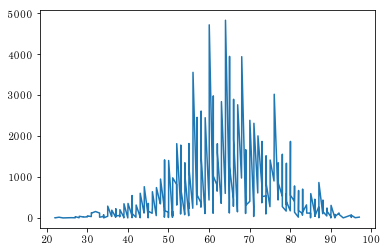

In [44]:
((rfbd['death_rdate'] - rfbd['birth_rdate'])/365).value_counts().sort_index().plot()

In [ ]:
found_df = pd.merge(figures, pd.DataFrame.from_dict({i: x for i, x in enumerate(found.items())},
                       orient='index',columns=['인물_ID','UCI'] ), how='right',
         on='인물_ID').rename(columns={'UCI_x':'UCI'})
found_df

In [42]:
# figures = figures.set_index('인물_ID')
# bp = bp.set_index('bpid')
indexer = rl.Index()
indexer.block(left_on='한글명칭', right_on='korname')
candidate_links = indexer.index(figures, bp)

In [44]:
candidate_links

MultiIndex([('M_0000002', 'G002+AKS-KHF_12AC15ACB8FFFFD1504X0'),
            ('M_0000004', 'G002+AKS-KHF_12AC15AD00FFFFU9999X0'),
            ('M_0000005', 'G002+AKS-KHF_12AC15B85CFFFFB1809X0'),
            ('M_0000007', 'G002+AKS-KHF_12AC15BC31FFFFB1690X0'),
            ('M_0000009', 'G002+AKS-KHF_12AC15BE48FFFFB1745X0'),
            ('M_0000011', 'G002+AKS-KHF_12AC15C11CFFFFB1538X0'),
            ('M_0000013', 'G002+AKS-KHF_12AC15C120FFFFB1645X0'),
            ('M_0000014', 'G002+AKS-KHF_12AC15C12CFFFFB1516X0'),
            ('M_0000017', 'G002+AKS-KHF_12AC15C2E0FFFFB1543X0'),
            ('M_0000019', 'G002+AKS-KHF_12AC15C5F0FFFFB1552X0'),
            ...
            ('M_5000881', 'G002+AKS-KHF_12CD5CD638FFFFB1582X0'),
            ('M_5001035', 'G002+AKS-KHF_12C624C18CFFFFB1602X0'),
            ('M_5001108', 'G002+AKS-KHF_13AE40C11DB82CB1836X0'),
            ('M_5001136', 'G002+AKS-KHF_12C815CCADFFFFB1821X0'),
            ('M_5001138', 'G002+AKS-KHF_13C815C218AC15B1454X0'),
         

In [ ]:
bp = bp.reset_index()
pd.merge(dates, bp, left_on='solardate', right_on='pass_date')['rdate']

In [ ]:
bp['pass_rdate'] = pd.merge(dates, bp, left_on='solardate', right_on='pass_date')['rdate']

In [ ]:
bp

In [ ]:
compare_cl = rl.Compare()

compare_cl.exact('한글이름', 'korname', label='korname')
compare_cl.exact('생년', 'birth', label='birth')
compare_cl.numeric('rdate','pass_rdate', label='rdate', method='linear', offset=365*50)
features = compare_cl.compute(candidate_links, figures, bp)
features

In [ ]:
rn = pd.merge(records, figures, on='인물_ID')
rn.loc[:,'서기일'] = rn['서기일'].replace("??",'15').astype(int)
rn['solardate'] = rn['서기년'].astype(str)+'-'+rn['서기월'].astype(str).str.zfill(2)+'-'+rn['서기일'].astype(str).str.zfill(2)
rn = pd.merge(rn, dates, on='solardate')
srdate = dict(zip(dates['solardate'], dates['rdate']))

In [ ]:
rn.groupby('인물_ID')['rdate'].apply(np.median)

In [ ]:
sillok = pd.read_csv('./data/sillok.csv')
sn = pd.read_csv('./data/sillok_name.csv')
sillok['lunardate'] = sillok['lunardate'].str.replace('??','15', regex=False)
ddict = dict(zip(dates['lunardate'], dates['solardate']))
ddict.update(dict(zip(dates['solardate'], dates['solardate'])))
sillok['solardate'] = sillok['lunardate'].map(ddict)
sillok['rdate'] = pd.merge(sillok, dates, on='solardate')['rdate']

In [ ]:
sn = pd.merge(sn, sillok,on='sid')[['sid','lunardate','solardate','rdate','nameid']]

In [ ]:
figures = pd.merge(figures, sn.groupby('nameid')['rdate'].apply(lambda x: np.median(x)),
         left_index=True, right_index=True,how='left')

In [ ]:
figures

In [28]:
import recordlinkage as rl
from recordlinkage.datasets import load_krebsregister

krebs_X, krebs_true_links = load_krebsregister(missing_values=0)
krebs_X
golden_pairs = krebs_X[0:5000]
golden_matches_index = golden_pairs.index & krebs_true_links # 2093 matching pairs

Data download succesfull.


In [45]:
match_index = candidate_links&found.items()

In [49]:
figures = figures.reset_index()
bp = bp.reset_index()

In [53]:
figures = figures.set_index('인물_ID')
bp = bp.set_index('bpid')
indexer = rl.Index()
indexer.full()
pairs = indexer.index(figures, bp)
pairs

MultiIndex([('M_0000001', 'G002+AKS-KHF_12BC30B454FFFFB1374X0'),
            ('M_0000001', 'G002+AKS-KHF_13C774C219BC88B1373X0'),
            ('M_0000001', 'G002+AKS-KHF_13B098B4DDACBDB1369X0'),
            ('M_0000001', 'G002+AKS-KHF_13AE40D6A8C6D0B1370X0'),
            ('M_0000001', 'G002+AKS-KHF_12C724C815FFFFB1376X0'),
            ('M_0000001', 'G002+AKS-KHF_13BCC0ACC4C190B1368X0'),
            ('M_0000001', 'G002+AKS-KHF_13D64DC911AC15B1373X0'),
            ('M_0000001', 'G002+AKS-KHF_13BBFCC778C0DDB1373X0'),
            ('M_0000001', 'G002+AKS-KHF_12BC15C870FFFFU9999X1'),
            ('M_0000001', 'G002+AKS-KHF_12D0C1D568FFFFB1345X0'),
            ...
            ('M_5001168', 'G002+AKS-KHF_13C11CC0C1B8E1U9999X0'),
            ('M_5001168', 'G002+AKS-KHF_13BA85AD11C11DU9999X0'),
            ('M_5001168', 'G002+AKS-KHF_13BC15D574C6A9U9999X0'),
            ('M_5001168', 'G002+AKS-KHF_13C815D64DC11DB1845X0'),
            ('M_5001168', 'G002+AKS-KHF_13AE40C81CB8E1U9999X0'),
         

In [ ]:
pairs & found.items()

In [50]:
pd.merge(figures, bp,)

,인물_ID,한글명칭,한자명칭,한글이름,한자이름,한글성씨,한자성씨,자(한글),자(한자),호(한글),...,본관(한자),생년,몰년,직업,작업이력,국가,UCI,비고,등록일,rdate_m
0,M_0000001,강견,姜涀,강견,姜涀,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1591.0,NaN,NaN,NaN,G002+AKS-KHF_12AC15ACACFFFFD1591X0,NaN,2015-07-10 18:55:54,160821.0
1,M_0000002,강겸,姜謙,강겸,姜謙,강,姜,겸지,謙之,NaN,...,晉州,NaN,1504.0,문반,NaN,NaN,G002+AKS-KHF_12AC15ACB8FFFFD1504X0,NaN,2015-07-10 18:55:54,93313.5
2,M_0000003,강곤,康袞,강곤,康袞,강,康,NaN,NaN,NaN,...,信川,1411.0,1484.0,무반,NaN,NaN,G002+AKS-KHF_12AC15ACE4FFFFB1411X0,NaN,2015-07-10 18:55:54,127015.0
3,M_0000004,강관,姜琯,강관,姜琯,강,姜,백옥,伯玉,NaN,...,晉州,NaN,NaN,문반,NaN,NaN,G002+AKS-KHF_12AC15AD00FFFFU9999X0,NaN,2015-07-10 18:55:54,48620.5
4,M_0000005,강노,姜㳣,강노,姜㳣,강,姜,기중,期仲,표운,...,晉州,1809.0,1887.0,문반,NaN,NaN,G002+AKS-KHF_12AC15B178FFFFB1809X0,NaN,2015-07-10 18:55:54,79613.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115856,M_5001164,김필,金㻶,김필,金㻶,김,金,필옥,筆玉,NaN,...,靈光,NaN,NaN,문반,신규 추가,NaN,G002+AKS-KHF_12AE40D544FFFFU9999X1,NaN,2015-07-10 18:55:54,NaN
115857,M_5001165,남기,南䄎,남기,南䄎,남,南,NaN,NaN,NaN,...,宜寧,NaN,NaN,문반,신규 추가,NaN,G002+AKS-KHF_12B0A8AE30FFFFU9999X0,NaN,2015-07-10 18:55:54,NaN
115858,M_5001166,여지,呂篪,여지,呂篪,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,문반,신규 추가,NaN,NaN,NaN,2015-07-10 18:55:54,NaN
115859,M_5001167,최진,崔鎭,최진,崔鎭,최,崔,NaN,NaN,NaN,...,慶州,NaN,NaN,문반,조선 초기 인물,NaN,G002+AKS-KHF_12CD5CC9C4FFFFU9999X3,NaN,2015-07-10 18:55:54,NaN
